***

## Project Description

British Airways (BA) is the flag carrier airline of the United Kingdom (UK). Every day, thousands of BA flights arrive to and depart from the UK, carrying customers across the world. Whether it’s for holidays, work or any other reason, the end-to-end process of scheduling, planning, boarding, fuelling, transporting, landing, and continuously running flights on time, efficiently and with top-class customer service is a huge task with many highly important responsibilities.

As a data scientist at BA, it will be your job to apply your analytical skills to influence real life multi-million-pound decisions from day one, making a tangible impact on the business as your recommendations, tools and models drive key business decisions, reduce costs and increase revenue.

Customers who book a flight with BA will experience many interaction points with the BA brand. Understanding a customer's feelings, needs, and feedback is crucial for any business, including BA.

This first task is focused on scraping and collecting customer feedback and reviewing data from a third-party source and analysing this data to present any insights you may uncover.

The first thing to do will be to scrape review data from the web. For this, you should use a website called Skytrax.

Once you have your dataset, you need to prepare it. The data will be very messy and contain purely text. You will need to perform data cleaning in order to prepare the data for analysis. When the data is clean, you should perform your own analysis to uncover some insights. As a starting point, you could look at topic modelling, sentiment analysis or wordclouds to provide some insight into the content of the reviews. It is recommended to complete this task using Python, however, you can use any tool that you wish. You can use some of the documentation websites provided in the Resources section below to analyse the data.

Your manager would like you to summarise your findings within a single PowerPoint slide, so that they can present the results at the next board meeting. You should create visualisations and metrics to include within this slide, as well as clear and concise explanations in order to quickly provide the key points from your analysis. Use the “PowerPoint Template” provided to complete the slide.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
import re

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

#sets the default autosave frequency in seconds
%autosave 60

%matplotlib inline

# SCIKIT-LEARN
import sklearn
#from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

# WORDCLOUD
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

# SPACY
import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from spacy.tokenizer import Tokenizer
from spacy.lexeme import Lexeme

# NLTK
#import nltk
#from nltk.tokenize import word_tokenize, sent_tokenize
#from nltk.corpus import stopwords, wordnet
#from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
#from nltk.probability import FreqDist
#from nltk.util import pad_sequence
#from nltk.util import bigrams
#from nltk.util import ngrams
#from nltk.util import everygrams
#from nltk.lm.preprocessing import pad_both_ends
#from nltk.lm.preprocessing import flatten
#from nltk.lm import MLE
#from nltk.lm.preprocessing import padded_everygram_pipeline

# TEXTBLOB
# import textblob
# from textblob import TextBlob

# PYCARET
# from pycaret.nlp import *

# BEAUTIFULSOUP
#from bs4 import BeautifulSoup

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

Autosaving every 60 seconds


## Import Data

### Pandas Method

In [2]:
df = pd.read_csv("BA_reviews.csv")
df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Beyond disgusted with the fa...
1,1,✅ Trip Verified | On July 19th 2022 I had subm...
2,2,✅ Trip Verified | I booked the flight on Oct ...
3,3,✅ Trip Verified | London to Gibraltar on 25th...
4,4,Not Verified | I’ve generally been a loyal Go...


In [3]:
df.columns

Index(['Unnamed: 0', 'reviews'], dtype='object')

In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

## Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [6]:
df.describe(include='all')

,reviews
count,1000
unique,1000
top,✅ Trip Verified | Beyond disgusted with the fa...
freq,1


### Word/Char Counts

In [7]:
df["word_count"] = df["reviews"].apply(lambda x: len(str(x).split()))

In [8]:
def char_counts(x):
    s = x.split()
    x = ''.join(s)
    return len(x)

In [9]:
df["char_count"] = df["reviews"].apply(lambda x: char_counts(str(x)))

In [10]:
df["avg_word_len"] = df["char_count"]/df["word_count"]

In [11]:
df["stop_words_len"] = df["reviews"].apply(lambda x: len([t for t in x.split() if t in stopwords]))

In [12]:
df["numerics_count"] = df["reviews"].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [13]:
df["uppercase_count"] = df["reviews"].apply(lambda x: len([t for t in x.split() if t.isupper()]))

In [14]:
df["titlecase_count"] = df["reviews"].apply(lambda x: len([t for t in x.split() if t.istitle()]))

In [15]:
df.head()

,reviews,word_count,char_count,avg_word_len,stop_words_len,numerics_count,uppercase_count,titlecase_count
0,✅ Trip Verified | Beyond disgusted with the fa...,78,356,4.56,35,1,2,7
1,✅ Trip Verified | On July 19th 2022 I had subm...,99,455,4.60,38,4,6,12
2,✅ Trip Verified | I booked the flight on Oct ...,184,823,4.47,82,1,12,21
3,✅ Trip Verified | London to Gibraltar on 25th...,102,468,4.59,46,0,5,12
4,Not Verified | I’ve generally been a loyal Go...,198,862,4.35,100,0,2,14


In [16]:
df.describe()

,word_count,char_count,avg_word_len,stop_words_len,numerics_count,uppercase_count,titlecase_count
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,149.76,670.14,4.52,67.23,1.28,5.28,18.20
std,99.82,437.42,0.30,49.54,1.73,5.23,10.18
min,27.00,118.00,3.67,5.00,0.00,0.00,3.00
25%,80.00,363.00,4.32,34.00,0.00,2.00,11.00
50%,124.00,556.50,4.50,55.00,1.00,4.00,16.00
75%,189.00,833.25,4.69,87.25,2.00,7.00,22.00
max,658.00,2877.00,5.84,354.00,13.00,36.00,78.00


## Text Processing

• Split Sentences and words

• Counting Sentences, words

• Word Count/Sentences

• Character/Words

• How many words are more than 10 char long

• Lowercasing words (Normalize) – run and RUN and Run

• Removing Whitespace – “ Love “ and “ Love”

• Removing Stop words – a, an, the, and so on

• Removing Digit – “23$ bill amount.”

• Finding character or word in sentences. “Paris is capital of France.”

• Reading file

## Clean Data

In [17]:
df2 = df[["reviews"]]

In [18]:
df2.head()

,reviews
0,✅ Trip Verified | Beyond disgusted with the fa...
1,✅ Trip Verified | On July 19th 2022 I had subm...
2,✅ Trip Verified | I booked the flight on Oct ...
3,✅ Trip Verified | London to Gibraltar on 25th...
4,Not Verified | I’ve generally been a loyal Go...


### Lowercase Conversion

In [19]:
df2["reviews"] = df2["reviews"].apply(lambda x: str(x).lower())

C:\Users\Dennis\AppData\Local\Temp\ipykernel_9456\1163775819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["reviews"] = df2["reviews"].apply(lambda x: str(x).lower())


In [20]:
df2

,reviews
0,✅ trip verified | beyond disgusted with the fa...
1,✅ trip verified | on july 19th 2022 i had subm...
2,✅ trip verified | i booked the flight on oct ...
3,✅ trip verified | london to gibraltar on 25th...
4,not verified | i’ve generally been a loyal go...
...,...
995,✅ trip verified | flew london heathrow to toro...
996,✅ trip verified | i flew british airways from ...
997,✅ trip verified | i flew british airways from ...
998,✅ trip verified | london to phoenix. decided ...


### Remove Special Characters from a String

In [21]:
df2["reviews"] = df2["reviews"].apply(lambda x: re.sub(r'[^a-zA-Z0-9 ]',"", x))

C:\Users\Dennis\AppData\Local\Temp\ipykernel_9456\2781738209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["reviews"] = df2["reviews"].apply(lambda x: re.sub(r'[^a-zA-Z0-9 ]',"", x))


In [22]:
df2

,reviews
0,trip verified beyond disgusted with the fact...
1,trip verified on july 19th 2022 i had submit...
2,trip verified i booked the flight on oct 8 ...
3,trip verified london to gibraltar on 25th o...
4,not verified ive generally been a loyal gold...
...,...
995,trip verified flew london heathrow to toront...
996,trip verified i flew british airways from he...
997,trip verified i flew british airways from mi...
998,trip verified london to phoenix decided to ...


### Remove Digits from a String

In [23]:
df2["reviews"] = df2["reviews"].apply(lambda x: re.sub(r'[0-9]',"", x))

C:\Users\Dennis\AppData\Local\Temp\ipykernel_9456\2250887457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["reviews"] = df2["reviews"].apply(lambda x: re.sub(r'[0-9]',"", x))


In [24]:
df2

,reviews
0,trip verified beyond disgusted with the fact...
1,trip verified on july th i had submitted a ...
2,trip verified i booked the flight on oct b...
3,trip verified london to gibraltar on th oct...
4,not verified ive generally been a loyal gold...
...,...
995,trip verified flew london heathrow to toront...
996,trip verified i flew british airways from he...
997,trip verified i flew british airways from mi...
998,trip verified london to phoenix decided to ...


### Remove multiple spaces

In [25]:
df2["reviews"] = df2["reviews"].apply(lambda x: ' '.join(x.split()))

C:\Users\Dennis\AppData\Local\Temp\ipykernel_9456\1384752862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["reviews"] = df2["reviews"].apply(lambda x: ' '.join(x.split()))


In [26]:
df2

,reviews
0,trip verified beyond disgusted with the fact t...
1,trip verified on july th i had submitted a com...
2,trip verified i booked the flight on oct but h...
3,trip verified london to gibraltar on th octobe...
4,not verified ive generally been a loyal gold s...
...,...
995,trip verified flew london heathrow to toronto ...
996,trip verified i flew british airways from heat...
997,trip verified i flew british airways from miam...
998,trip verified london to phoenix decided to pay...


### Remove Stop Words

In [27]:
df2["no_stopwords"] = df2["reviews"].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))

C:\Users\Dennis\AppData\Local\Temp\ipykernel_9456\2993830546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["no_stopwords"] = df2["reviews"].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))


In [28]:
df2.head()

,reviews,no_stopwords
0,trip verified beyond disgusted with the fact t...,trip verified disgusted fact baggage delivered...
1,trip verified on july th i had submitted a com...,trip verified july th submitted complaint form...
2,trip verified i booked the flight on oct but h...,trip verified booked flight oct cancel flight ...
3,trip verified london to gibraltar on th octobe...,trip verified london gibraltar th october book...
4,not verified ive generally been a loyal gold s...,verified ive generally loyal gold status flyer...


### Word Cloud

In [29]:
text = ' '.join(df2["no_stopwords"])

In [30]:
text

'trip verified disgusted fact baggage delivered weeks emails calls ba pieces reported th september ba responses generic non specific attempts speak customer service worker obstructed airline touting values claiming yo best world disgraceful fully describe customer service trip verified july th submitted complaint form regards fact ba misplaced luggage wedding trip italy weve lost days incurred additional expenses retrieving provided copy receipts requested expenses reimbursed agreed sent requested information told weeks receiving months later british airways processed reimbursements stopped answering followups matter trip verified booked flight oct cancel flight day learning cant entry visa time flight receive confirmation email says flight canceled cancellation email booking reference number different requested cancellation ba canceled persons flight sent confirmation email assumed flight canceled weeks received refund reached turned flight getting ridiculous try reach ba tried multip

In [31]:
wc = WordCloud(width=400, height=330, max_words=100, background_color="white").generate(text)

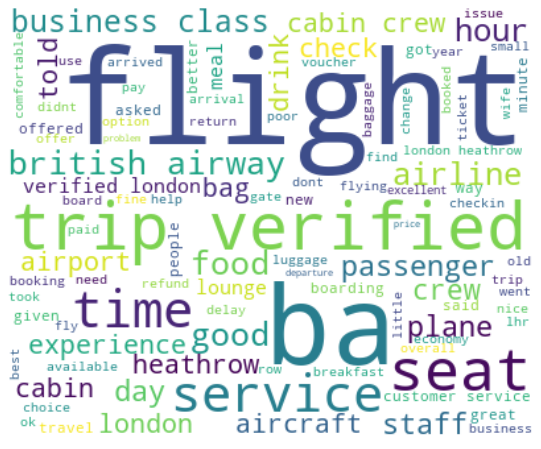

In [32]:
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## Save Data

In [33]:
#df.to_csv("cleaned.csv", index=False)

#### Python code done by Dennis Lam

***